<a href="https://colab.research.google.com/github/20WH1A6637/Heart-Disease-Classification/blob/main/HeartDiseaseClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/HeartDiseaseClassification/hdc_dataset.csv"
df = pd.read_csv(path)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.shape

(303, 15)

In [ ]:
df.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,4,57,female,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,yes


In [ ]:
df = df.drop('Unnamed: 0', axis = 1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,57,female,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,yes


In [ ]:
df.describe()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,299.000000,302.000000,303.000000,303.000000,298.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.966997,131.712375,246.317881,0.148515,0.528053,149.865772,0.326733,1.039604,1.399340,0.729373,2.313531
std,9.082101,1.032052,17.629032,51.908285,0.356198,0.525860,22.563687,0.469794,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,120.000000,211.000000,0.000000,0.000000,134.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


In [ ]:
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholestrol', 'fasting_blood-pressure', 'rest_ecg', 'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    object 
 2   chest_pain_type          303 non-null    int64  
 3   resting_blood_pressure   299 non-null    float64
 4   cholestrol               302 non-null    float64
 5   fasting_blood-pressure   303 non-null    int64  
 6   rest_ecg                 303 non-null    int64  
 7   max_heart_rate_achieved  298 non-null    float64
 8   exercise_induced_angina  303 non-null    int64  
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    int64  
 11  num_major_vessels        303 non-null    int64  
 12  thalassemia              303 non-null    int64  
 13  target                   303 non-null    object 
dtypes: float64(4), int64(8), o

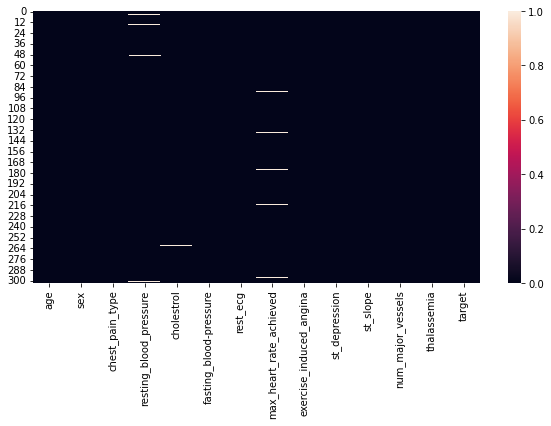

In [ ]:
#extract the column names
cols = df.columns

#plot a heatmap of missing values with seaborn
plt.figure(figsize = (10,5))
sns.heatmap(df[cols].isnull())

In [ ]:
df['sex'].replace({'male':0, 'female':1},inplace=True)
df['target'].replace({'yes':1,'no':0},inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    int64  
 2   chest_pain_type          303 non-null    int64  
 3   resting_blood_pressure   299 non-null    float64
 4   cholestrol               302 non-null    float64
 5   fasting_blood-pressure   303 non-null    int64  
 6   rest_ecg                 303 non-null    int64  
 7   max_heart_rate_achieved  298 non-null    float64
 8   exercise_induced_angina  303 non-null    int64  
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    int64  
 11  num_major_vessels        303 non-null    int64  
 12  thalassemia              303 non-null    int64  
 13  target                   303 non-null    int64  
dtypes: float64(4), int64(10)
m

In [ ]:
missing_pct = round(df.isnull().sum()/len(df) * 100, 1)
print(missing_pct)

age                        0.0
sex                        0.0
chest_pain_type            0.0
resting_blood_pressure     1.3
cholestrol                 0.3
fasting_blood-pressure     0.0
rest_ecg                   0.0
max_heart_rate_achieved    1.7
exercise_induced_angina    0.0
st_depression              0.0
st_slope                   0.0
num_major_vessels          0.0
thalassemia                0.0
target                     0.0
dtype: float64


In [ ]:
df["resting_blood_pressure"]=df["resting_blood_pressure"].replace(np.NaN,int(df["resting_blood_pressure"].mean()))
df["cholestrol"]=df["cholestrol"].replace(np.NaN,int(df["cholestrol"].mean()))
df["max_heart_rate_achieved"]=df["max_heart_rate_achieved"].replace(np.NaN,int(df["max_heart_rate_achieved"].mean()))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    int64  
 2   chest_pain_type          303 non-null    int64  
 3   resting_blood_pressure   303 non-null    float64
 4   cholestrol               303 non-null    float64
 5   fasting_blood-pressure   303 non-null    int64  
 6   rest_ecg                 303 non-null    int64  
 7   max_heart_rate_achieved  303 non-null    float64
 8   exercise_induced_angina  303 non-null    int64  
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    int64  
 11  num_major_vessels        303 non-null    int64  
 12  thalassemia              303 non-null    int64  
 13  target                   303 non-null    int64  
dtypes: float64(4), int64(10)
m

In [ ]:
df['resting_blood_pressure'] = df['resting_blood_pressure'].astype(int)
df['cholestrol'] = df['cholestrol'].astype(int)
df['max_heart_rate_achieved'] = df['max_heart_rate_achieved'].astype(int)
df['target'] = df['target'].astype(int)
df['st_depression'] = df['st_depression'].astype(int)

In [ ]:
df

,age,sex,chest_pain_type,resting_blood_pressure,cholestrol,fasting_blood-pressure,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,0,3,145,233,1,0,150,0,2,0,0,1,1
1,37,0,2,130,250,0,1,187,0,3,0,0,2,1
2,41,1,1,130,204,0,0,172,0,1,2,0,2,1
3,56,0,1,120,236,0,1,178,0,0,2,0,2,1
4,57,1,0,131,354,0,1,163,1,0,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,1,0,140,241,0,1,123,1,0,1,0,3,0
299,45,0,3,110,264,0,1,132,0,1,1,0,3,0
300,68,0,0,144,193,1,1,141,0,3,1,2,3,0
301,57,0,0,131,131,0,1,115,1,1,1,1,3,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   age                      303 non-null    int64
 1   sex                      303 non-null    int64
 2   chest_pain_type          303 non-null    int64
 3   resting_blood_pressure   303 non-null    int64
 4   cholestrol               303 non-null    int64
 5   fasting_blood-pressure   303 non-null    int64
 6   rest_ecg                 303 non-null    int64
 7   max_heart_rate_achieved  303 non-null    int64
 8   exercise_induced_angina  303 non-null    int64
 9   st_depression            303 non-null    int64
 10  st_slope                 303 non-null    int64
 11  num_major_vessels        303 non-null    int64
 12  thalassemia              303 non-null    int64
 13  target                   303 non-null    int64
dtypes: int64(14)
memory usage: 33.3 KB


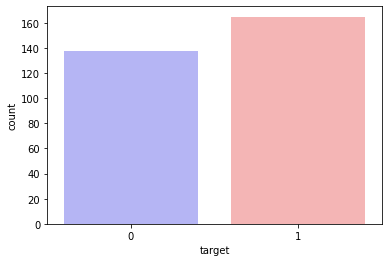

In [ ]:
sns.countplot(x = "target", data = df, palette = "bwr")
plt.show()

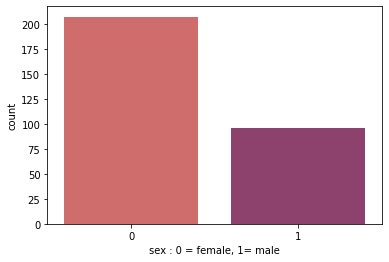

In [ ]:
sns.countplot(x='sex', data=df, palette="flare")
plt.xlabel("sex : 0 = female, 1= male")
plt.show()

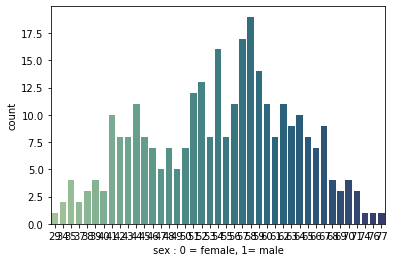

In [ ]:
sns.countplot(x = 'age', data = df, palette = "crest")
plt.xlabel("sex : 0 = female, 1= male")
plt.show()

In [ ]:
features = df.drop(columns = ['target'], axis = 1)

In [ ]:
result = df['target']

In [ ]:
features

,age,sex,chest_pain_type,resting_blood_pressure,cholestrol,fasting_blood-pressure,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia
0,63,0,3,145,233,1,0,150,0,2,0,0,1
1,37,0,2,130,250,0,1,187,0,3,0,0,2
2,41,1,1,130,204,0,0,172,0,1,2,0,2
3,56,0,1,120,236,0,1,178,0,0,2,0,2
4,57,1,0,131,354,0,1,163,1,0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,1,0,140,241,0,1,123,1,0,1,0,3
299,45,0,3,110,264,0,1,132,0,1,1,0,3
300,68,0,0,144,193,1,1,141,0,3,1,2,3
301,57,0,0,131,131,0,1,115,1,1,1,1,3


In [ ]:
result

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [ ]:
features_train, features_test, result_train, result_test = train_test_split(features, result, test_size = 0.3, random_state = 156)

In [ ]:
features_val, features_test, result_val, result_test = train_test_split(features_test, result_test, test_size = 0.5, random_state = 146)

In [ ]:
len(features_train)

212

In [ ]:
len(features_val)

45

In [ ]:
len(features_test)

46

In [ ]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import lazypredict

In [ ]:
from lazypredict.Supervised import LazyClassifier

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
clf = LazyClassifier(predictions=True)
models, predictions = clf.fit(features_train, features_val, result_train, result_val)

100%|██████████| 29/29 [00:01<00:00, 24.78it/s]


In [ ]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
Perceptron,0.89,0.89,0.89,0.89,0.02
NearestCentroid,0.89,0.89,0.89,0.89,0.03
BernoulliNB,0.89,0.89,0.89,0.89,0.01
AdaBoostClassifier,0.87,0.87,0.87,0.87,0.19
CalibratedClassifierCV,0.87,0.87,0.87,0.87,0.05
ExtraTreesClassifier,0.87,0.87,0.87,0.87,0.12
GaussianNB,0.87,0.87,0.87,0.87,0.01
LogisticRegression,0.87,0.87,0.87,0.87,0.05
PassiveAggressiveClassifier,0.87,0.87,0.87,0.87,0.02


In [ ]:
predictions

,AdaBoostClassifier,BaggingClassifier,BernoulliNB,CalibratedClassifierCV,DecisionTreeClassifier,DummyClassifier,ExtraTreeClassifier,ExtraTreesClassifier,GaussianNB,KNeighborsClassifier,...,PassiveAggressiveClassifier,Perceptron,QuadraticDiscriminantAnalysis,RandomForestClassifier,RidgeClassifier,RidgeClassifierCV,SGDClassifier,SVC,XGBClassifier,LGBMClassifier
0,1,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,1,1,1,1,0,1,1,1,1,...,0,0,1,1,1,1,0,1,1,1
8,1,0,1,1,1,0,1,0,1,0,...,1,1,1,1,1,1,0,0,1,0
9,1,1,1,1,1,0,1,1,1,0,...,1,1,0,1,1,1,1,1,1,1


In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import AdaBoostClassifier
from sklearn.calibration import CalibratedClassifierCV

In [ ]:
model1 = Perceptron()
model1.fit(features_train, result_train)
prediction1 = model1.predict(features_test)
model1.score(features_test, result_test)

0.41304347826086957

In [ ]:
model2 = BernoulliNB()
model2.fit(features_train, result_train)
prediction2 = model2.predict(features_test)
model2.score(features_test, result_test)

0.8913043478260869

In [ ]:
model3 = NearestCentroid()
model3.fit(features_train, result_train)
prediction = model3.predict(features_test)
model3.score(features_test, result_test)

0.7608695652173914

In [ ]:
model4 = AdaBoostClassifier()
model4.fit(features_train, result_train)
prediction4 = model4.predict(features_test)
model4.score(features_test, result_test)

0.9347826086956522

In [ ]:
model5 = CalibratedClassifierCV()
model5.fit(features_train, result_train)
prediction5 = model5.predict(features_test)
model5.score(features_test, result_test)


0.8695652173913043

|**Model**                    |    **ValidationScore**   |   **TestScore**    |
|-----------------------------|--------------------------|--------------------|
|**Perceptron**               |          0.89            |       0.41         |
|-----------------------------|--------------------------|--------------------|
|**BernoulliNaiveBayes**      |          0.89            |       0.89         |
|-----------------------------|--------------------------|--------------------|
|**NearestCentroid**          |          0.89            |       0.76         |
|-----------------------------|--------------------------|--------------------|
|**AdaBoostClassifier**       |          0.87            |       0.93         |
|-----------------------------|--------------------------|--------------------|
|**CalibratedClassifierCV**   |          0.87            |       0.86         |
|-----------------------------|--------------------------|--------------------|






In [ ]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.3 MB 28.1 MB/s 
     |████████████████████████████████| 212 kB 58.2 MB/s 
     |████████████████████████████████| 84 kB 5.1 MB/s 
     |████████████████████████████████| 54 kB 4.0 MB/s 
     |████████████████████████████████| 2.3 MB 58.1 MB/s 
     |████████████████████████████████| 84 kB 671 kB/s 
     |████████████████████████████████| 272 kB 72.3 MB/s 
     |████████████████████████████████| 54 kB 4.1 MB/s 
     |████████████████████████████████| 57 kB 6.6 MB/s 
     |████████████████████████████████| 140 kB 73.4 MB/s 
     |████████████████████████████████| 1.1 MB 45.6 MB/s 
     |████████████████████████████████| 144 kB 56.5 MB/s 
     |████████████████████████████████| 271 kB 10.4 MB/s 
     |████████████████████████████████| 94 kB 4.1 MB/s 
     |████████████████████████████████| 63 kB 1.4 MB/s 
     |████████████████████████████████| 80 kB

In [ ]:

import gradio as gr

In [ ]:
def classifyDisease(age, sex, chest_pain_type, resting_blood_pressure, cholestrol, fasting_blood_pressure, rest_ecg, max_heart_rate_achieved, exercise_induced_angina, st_depression, st_slope, num_major_vessels, thalassemia):
    x = np.array([age, sex, chest_pain_type, resting_blood_pressure, cholestrol, fasting_blood_pressure, rest_ecg, max_heart_rate_achieved, exercise_induced_angina, st_depression, st_slope, num_major_vessels, thalassemia])
    prediction = model4.predict(x.reshape(1, -1))
    if prediction == 1:
        return "Diagnosis for Heart Disease is Present"
    else:
       return "Diagnosis of Heart Disease is Absent"
demo = gr.Interface(
    fn = classifyDisease,
    inputs = [gr.Slider(0, 100), "number", "number", "number", "number", "number", "number", "number", "number", "number", "number", "number", "number"],
    outputs= "text",
    title = "HEART DISEASE CLASSIFICATION MODEL",
    description = """age. The age of the patient\nsex: (1 = male, 0 = female)
        chest_pain_type: (1 = typical angina, 2 = atypical angina, 3 = non — anginal pain, 4 = asymptotic)
        resting_blood_pressure: in mmHg\ncholestrol: Serum Cholestero in mg/dl
        fasting_blood_pressure: (1 = fasting blood sugar is more than 120mg/dl, 0 = otherwise)
        max_heart_rate_acheived: Resting ElectroCardioGraphic results (0 = normal, 1 = ST-T wave abnormality, 2 = left ventricular hyperthrophy)
        exercise_induced_angina: Exercise induced angina(1 = yes, 0 = no)\nst_depression: ST depression induced by exercise relative to rest
        st_slope: Peak exercise ST segment (1 = upsloping, 2 = flat, 3 = downsloping)
        num_major_vessels: Number of major vessels (0–3) colored by flourosopy
        thalassemia: Thalassemia (3 = normal, 6 = fixed defect, 7 = reversible defect)""",
    examples = [[63, 0, 3, 145, 233, 1, 0, 150, 0, 2, 0, 0, 1, ],
       [57, 1, 0, 140, 241, 0, 1, 123, 1, 0, 1, 0, 3, 0],
       [37, 0, 2, 130, 250, 0, 1, 187, 0, 3, 0, 0, 2, 0],
       [45, 0, 3, 110, 264, 0, 1, 132, 0, 1, 1, 0, 3, 0],
       [41, 1, 1, 130, 204, 0, 0, 172, 0, 1, 2, 0, 2, 0],
       [68, 0, 0, 144, 193, 1, 1, 141, 0, 3, 1, 2, 3, 0],
       [56, 0, 1, 120, 236, 0, 1, 178, 0, 0, 2, 0, 2, 0],
       [57, 1, 0, 131, 354, 0, 1, 163, 1, 0, 2, 0, 2, 0],
       [57, 0, 0, 131, 131, 0, 1, 115, 1, 1, 1, 1, 3, 0],
       [57, 0, 0, 140, 192, 0, 1, 148, 0, 0, 1, 0, 1, 0]],
      allow_screenshot=False,
      theme = "dark",
      css = 'body{background-image:url("https://images.app.goo.gl/2dUBNCXWTccJmBAp9.jpg");}'
    )

demo.launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://13592.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<gradio.routes.App at 0x7f8ceaf37a50>,
 'http://127.0.0.1:7861/',
 'https://13592.gradio.app')